In [18]:
import sys
sys.path.append("..")
import json
import numpy as np
import random
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import csv

In [19]:
target_values = [1, 0, 1, 1, 1, 0.8, 0.95]
count_violations = np.zeros((128),dtype = int)

priority_list = []
with open("priority_list.csv") as csvfile:
    csv_file = csv.reader(csvfile)
    for row in csv_file:
        priority_list.append(row[:-1])
    priority_list = [[float(x) for x in row] for row in priority_list]
priority_list = np.array(priority_list)

# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd(), "..")) + "/2020_12_01_NSGA_II_results_10000"
file_folder_orgin = "D:/ASE2020-ExperimentData/RandomSearch/TurnRight_Datalog_2021_01_15_11/2021_01_15_Random_results_200000"
# file_folder_orgin = "D:/ASE2020-ExperimentData/GA/Overtake_2021_01_07_NSGA_III_results_20000"
# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd())) + "/2020_12_26_Random_results_20000"
result_list = []
fileList = os.listdir(file_folder_orgin)
fileList.sort()
for i in range(len(fileList)):
    textname = file_folder_orgin + '/' + fileList[i]
    result = np.loadtxt(textname)
    violation_pattern = np.zeros((7), dtype = int)
    result_list.append(result)
    for j in range(len(violation_pattern)):
        if result[j] < target_values[j]:
            violation_pattern[j] = 1
        else:
            violation_pattern[j] = 0
            
    flag = 0
    for j in range (priority_list.shape[0]):
        if (np.array(violation_pattern) == priority_list[j]).all():
            flag = 1
            count_violations[j] += 1
            break
    if flag == 0:
        print(violation_pattern)
print(count_violations, count_violations.sum(), np.array(result_list).shape[0])



[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     4     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     1     0     0
     0     0     0   112     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     1     0     0     0     0     0   104
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0    15     0     0     0     0     0     0     0     0     0
     0  2244     0    62     0     0     0 39656] 42199 42199


In [20]:
criticality = 0
for i in range(len(count_violations)):
    criticality += count_violations[i] * (127-i)/127
    
print(criticality/count_violations.sum())

category = 0
for i in range(len(count_violations)):
    if count_violations[i] > 0:
        category += 1

print(category, category/128)

0.004656415151831228
9 0.0703125


In [21]:
sns.set_style("darkgrid")
data_result = DataFrame(result_list)
data_result.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g'},inplace=True)#注意这里0和1都不是字符串
data_result.dropna(axis=0,how='any')

,a,b,c,d,e,f,g
0,1.0,60.148877,1.000000,1.0,1.0,0.998472,0.999835
1,1.0,3.919296,1.000000,1.0,1.0,0.993697,0.998890
2,1.0,6.865025,1.000000,1.0,1.0,0.995876,0.999005
3,1.0,22.180311,1.000000,1.0,1.0,0.999779,0.999953
4,1.0,34.088168,1.000000,1.0,1.0,0.997434,0.999885
...,...,...,...,...,...,...,...
42194,1.0,11.681459,1.000000,1.0,1.0,0.995785,0.999364
42195,1.0,13.401861,1.000000,1.0,1.0,0.996050,0.998807
42196,1.0,6.765285,0.868110,1.0,1.0,0.997175,0.999071
42197,1.0,6.810800,0.984537,1.0,1.0,0.994834,0.999220


D:\Anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


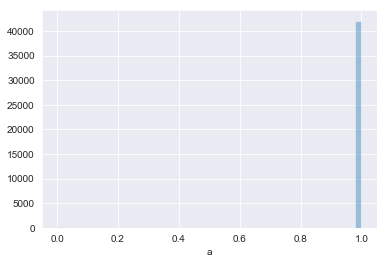

In [22]:
sns.distplot(data_result['a'],kde = False)

In [23]:
data_result.min()

a    0.000000
b   -1.000000
c    0.537157
d    1.000000
e    0.013158
f    0.931163
g    0.997787
dtype: float64

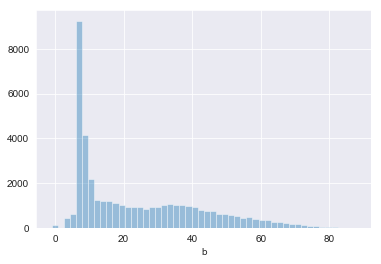

In [24]:
sns.distplot(data_result['b'],kde = False)

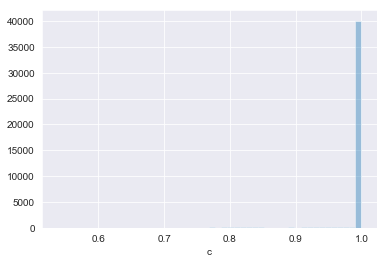

In [25]:
sns.distplot(data_result['c'],kde = False)

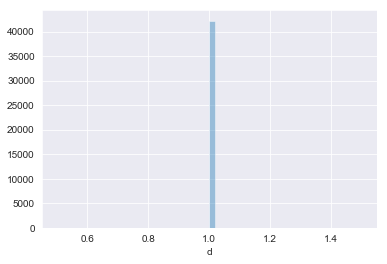

In [26]:
sns.distplot(data_result['d'],kde = False)

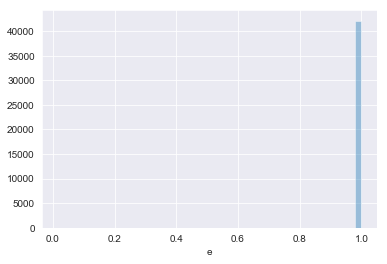

In [27]:
sns.distplot(data_result['e'],kde = False)

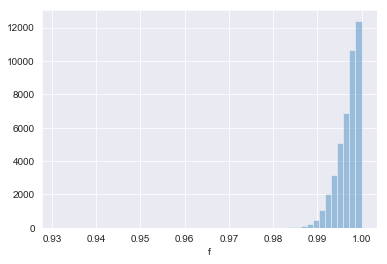

In [28]:
sns.distplot(data_result['f'],kde = False)

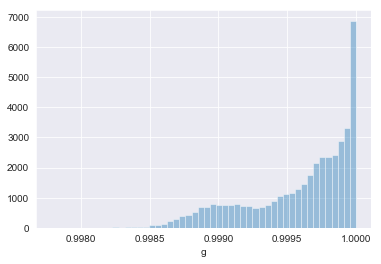

In [29]:
sns.distplot(data_result['g'],kde = False)

          a         b         c   d         e         f         g
a  1.000000 -0.004492 -0.010028 NaN -0.002187  0.010079  0.003955
b -0.004492  1.000000  0.171229 NaN  0.037435  0.596749  0.700768
c -0.010028  0.171229  1.000000 NaN  0.035675  0.052009  0.354197
d       NaN       NaN       NaN NaN       NaN       NaN       NaN
e -0.002187  0.037435  0.035675 NaN  1.000000  0.060169  0.101383
f  0.010079  0.596749  0.052009 NaN  0.060169  1.000000  0.628352
g  0.003955  0.700768  0.354197 NaN  0.101383  0.628352  1.000000


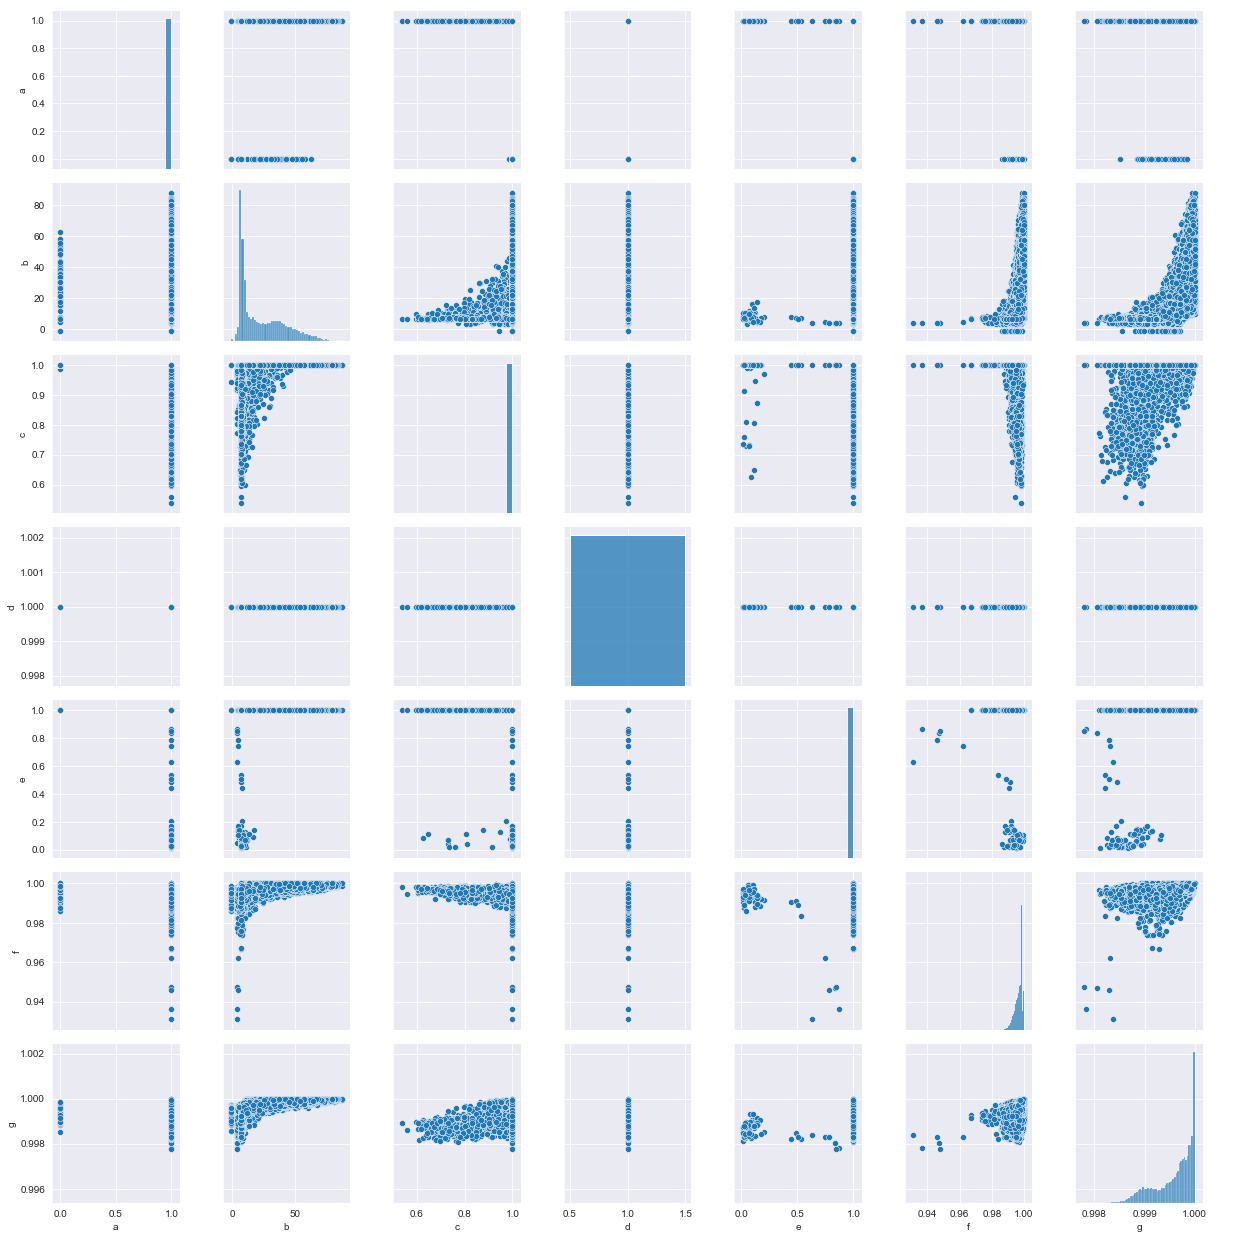

In [30]:
print(data_result.corr())
sns.pairplot(data_result)

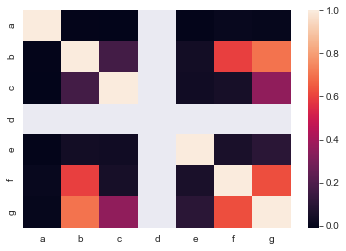

In [31]:
sns.heatmap(data_result.corr())

ValueError: The condensed distance matrix must contain only finite values.

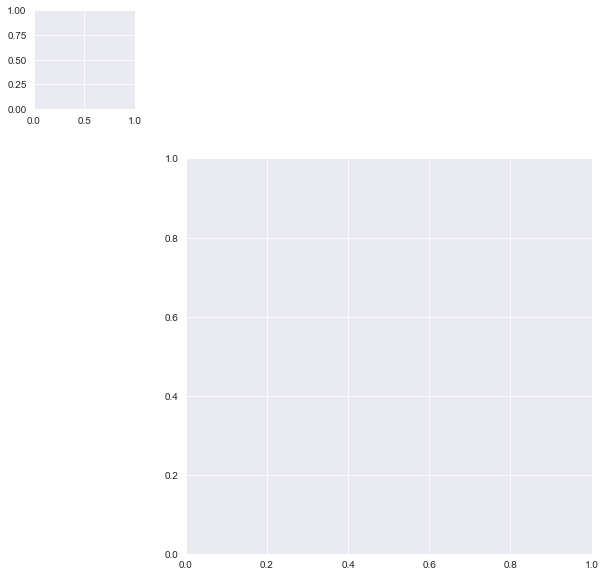

In [32]:
sns.clustermap(data_result.corr())

In [ ]:
g = sns.PairGrid(data_result)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)